In [8]:
import pandas as pd
import numpy as np
import math as math
from matplotlib import pyplot as plt
from IPython.display import display, Math, HTML
import scipy.optimize as op
from pylab import *
from tabulate import tabulate

## **Extractor Sólido-Líquido**

El aceite debe ser extraído de una masa por medio de benceno usando un extractor continúo a contracorriente. La unidad trata 1,000 kg de masa (en base a un sólido completamente agotado), por hora.

La masa no tratada tiene 400 kg de aceite y está contaminada con 25 kg de benceno. La mezcla fresca contiene 10 kg de aceite y 655 kg de benceno.

El sólido agotado contiene 60 kg de aceite no extraído. Los datos de equilibrio son los siguientes:

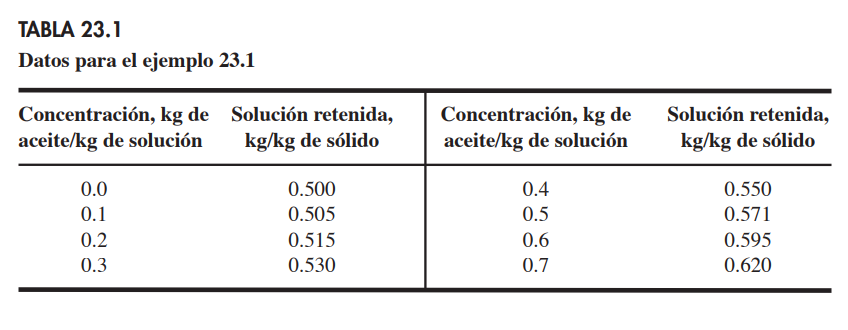

Encontrar:
* La concentración en el extracto.
* La concentración de la solución que sale con los sólidos extraídos.
* La masa de solución que sale con la masa extraída.
* La masa de extracto
* Número de etapas requeridas

In [13]:
#Cálculo de la línea de equilibrio
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
alfa=np.polyfit(x,y,10)
ev=np.polyval(alfa,x)

#Ajuste a un polinomio de los datos experimentales
xexp=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7] #kg de aceite/kg de solución
yexp=[0.5,0.505,0.515,0.530,0.550,0.571,0.595,0.620] #kg de solución retenida/kg de sólido
alfa2=np.polyfit(xexp,yexp,5)
ev1=np.polyval(alfa2,xexp)


In [31]:
#Cálculo de solución a la entrada del extractor
Fa=655 #kg Cantidad de benceno a la entrada
Fb=10 #kg  Cantidad de aceite a la entrada
Fc=400 #Aceite en el sólido
Fd=25 #kg Benceno en el sólido
xb=0.1 #fracción solución retenido (Suposición)
U=1000 #kg masa en base seca
U_sec=60 #kg  de aceite en sólido agotado

Vb=Fb+Fa #Masa de solución que entra, fuera del sólido
yb=Fb/Vb #Fracción de aceite en la solución de entrada

n=100
TOL=0.0001
for i in range(n): #Se itera para conocer la fracción xb de kg de aceite/kg de solución retenida
  Lb=U*np.polyval(alfa2,xb) #Cantidad de solución retenida en el sólido
  xb0=xb
  xb=U_sec/Lb
  if fabs(xb0-xb)<TOL:
    break
  else:
    continue
La=Fd+Fc #Solución aceite+benceno dentro  el sólido a la entrada
xa=Fc/La #Fracción de aceite en la solución dentro del sólido

#Lb-U_sec es la cantidad de benceno dentro del sólido a la salida
solvextr=Fa+Fd-(Lb-U_sec) #Calculamos la cantidad de benceno en el extracto (libre) a la salida

oilextr=Fb+Fc-U_sec #Calculamos la cantidad de aceite en el extracto (libre) a la salida
Va=solvextr+oilextr #Solución aceite+benceno a la salida
ya=oilextr/Va #Fracción de aceite en la solución (Extracto) a la salida
print('Fracción de aceite en el solvente fresco entrando al sistema %.4f'%yb)
print("Fracción de aceite retenido en el sólido entrante: %.4f"%xa)
print('Fracción de aceite retenido por el sólido saliente: %.4f'%xb)
print("Fracción de aceite en el extracto saliente: %.4f"%ya)
print('Cantidad de solución retenida en el sólido saliente: %.4f kg/h'%Lb)
print("Cantidad de extracto: %.4f kg/h"%Va)


Fracción de aceite en el solvente fresco entrando al sistema 0.0150
Fracción de aceite retenido en el sólido entrante: 0.9412
Fracción de aceite retenido por el sólido saliente: 0.1185
Fracción de aceite en el extracto saliente: 0.5997
Cantidad de solución retenida en el sólido saliente: 506.4011 kg/h
Cantidad de extracto: 583.5989 kg/h


Etapas de equilibrio, punto por punto
     Xplatos         Yplatos      
    0.9411765       0.5997270 
    0.5997270       0.5997270 
    0.5997270       0.4070993 
    0.4070993       0.4070993 
    0.4070993       0.2453654 
    0.2453654       0.2453654 
    0.2453654       0.1151423 
    0.1151423       0.1151423 
i = 8
Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i = 8 ), por lo tanto NoPuntos =  8 . Si el i > 8 , los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.
Por lo tanto el número de etapas de equilirbio es: 4.0


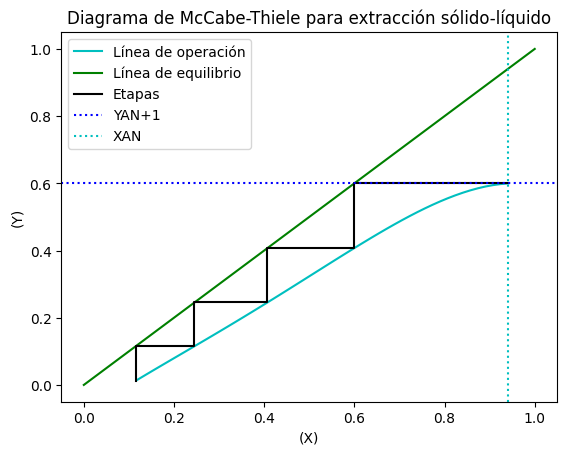

In [68]:
#Para obtener puntos intermedios en la línea de operación, construirla a partir de xa, ya, xb, yb y de al menos 3 puntos internos xn
#xn es la fracción de aceite/kg de solución retenida en el sólido
#El primero determinarlo a través de la condición x1=ya
x1=ya

#De ahí proponer puntos intermedios
xn=[xa,x1,0.75*x1,x1/2]
n=len(xn)-1
yn1=[]
yn1.append(ya)
for i in range(n):
  L1=np.polyval(alfa2,xn[i+1])*U #Cantidad de solución retenida en el sólido en la etapa n
  V2=L1+Va-La #Masa de solución que entra en la etapa n+1, fuera del sólido
  y2=((L1*xn[i+1])+(Va*ya)-(La*xa))/(V2) #Fracción de aceite en la etapa n+1, en la solución fuera del sólido
  yn1.append(y2)


xn.append(xb)
yn1.append(yb)

xop=np.linspace(xb,xa,50)
aop=np.polyfit(xn,yn1,4)
yop=np.polyval(aop,xop)

print ("Etapas de equilibrio, punto por punto")
print('     Xplatos         Yplatos      ')
yp=ya
YP = [ya]
XP = [xa]
i = 0
while yp > yb : #Este ciclo permite asignar los valores de "X" y "Y" para los escalones que se construyen entre las líneas de operación y equilibrio
    xp = np.polyval(alfa,YP[i]) # A partir de un valor inicial de "Y" se sustituye en la ecuación de equilibrio
    XP.append(xp)
    yp = np.polyval(aop,XP[i]) #La fracción en líquido asignada en la ecuación de equilibrio se sustituye en la línea de operación para dar un nuevo valor de "Y" para asignar cuando se reinicia el ciclo
    YP.append(yp)
    print ('%13.7f %15.7f ' % (XP[i],YP[i]))
    i += 1
print ("i =", i)

NE = i/2
print ("Para saber las etapas de equilibrio analíticamente, se cuentan los puntos antes de que Y=YN1 y se dividen entre dos, en este caso el número de puntos es igual a i (i =",i,"), por lo tanto NoPuntos = ",i,". Si el i >",i,", los escalones de la gráfica pasarían la línea de LN+1 (línea punteada azul), de esta manera también se podría observar que el número de platos es mayor al necesario.")
print ("Por lo tanto el número de etapas de equilirbio es:", NE)


plt.title('Diagrama de McCabe-Thiele para extracción sólido-líquido')
plt.xlabel('(X)')
plt.ylabel('(Y)')
plt.plot(xop, yop, '-', color='c', label = 'Línea de operación')
plt.plot(x, y, '-', color='g', label = 'Línea de equilibrio')
plt.plot(XP, YP, '-', color='k', label = 'Etapas')
axhline(ya, color='b', ls="dotted", label = 'YAN+1')
axvline(xa, color='c', ls="dotted", label = 'XAN')
plt.legend()
plt.show()

